In [41]:
from __future__ import print_function
from builtins import input

import numpy as np

from sporco.admm import tvl2
from sporco import util
from sporco import metric
from sporco import plot
plot.config_notebook_plotting()

In [42]:
img = util.ExampleImages().image('e.jpg', scaled=True,
                                 idxexp=np.s_[:,:])

In [43]:
np.random.seed(12345)
imgn = img + np.random.normal(0.0, 0.3, img.shape)

In [44]:
lmbda = 0.06
opt = tvl2.TVL2Denoise.Options({'Verbose': True, 'MaxMainIter': 100,
                                'RelStopTol': 2e-2, 'gEvalY': False,
                                'AutoRho': {'Enabled': True}})

In [45]:
b = tvl2.TVL2Denoise(imgn, lmbda, opt, caxis=2)
imgr = b.solve()

Itn   Fnc       DFid      RegTV     r         s         ρ       
----------------------------------------------------------------
   0  1.71e+04  7.67e+03  1.58e+05  2.70e-01  2.79e+00  2.20e-01
   1  1.54e+04  2.89e+03  2.08e+05  5.93e-02  2.37e-01  2.20e-01
   2  1.53e+04  2.46e+03  2.14e+05  3.70e-02  7.65e-02  1.10e-01
   3  1.53e+04  2.33e+03  2.16e+05  2.23e-02  1.92e-02  7.65e-02
   4  1.53e+04  2.33e+03  2.16e+05  1.54e-02  1.35e-02  7.65e-02
----------------------------------------------------------------


In [46]:
print("TVL2Denoise solve time: %5.2f s" % b.timer.elapsed('solve'))
print("Noisy image PSNR:    %5.2f dB" % metric.psnr(img, imgn))
print("Denoised image PSNR: %5.2f dB" % metric.psnr(img, imgr))

TVL2Denoise solve time: 13.46 s
Noisy image PSNR:    10.46 dB
Denoised image PSNR: 12.53 dB


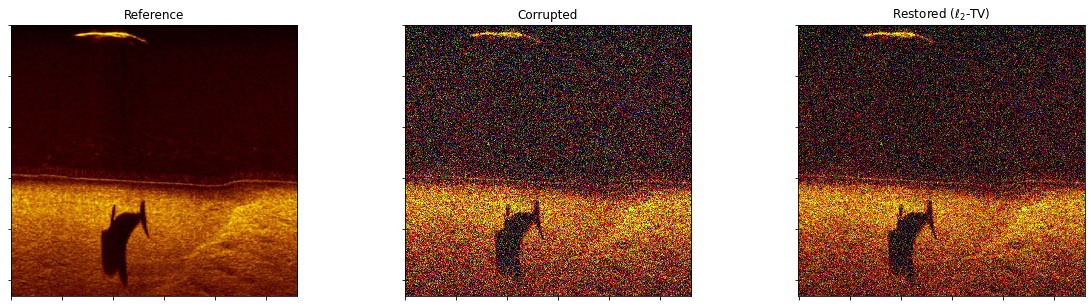

In [47]:
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.imview(img, title='Reference', fig=fig)
plot.subplot(1, 3, 2)
plot.imview(imgn, title='Corrupted', fig=fig)
plot.subplot(1, 3, 3)
plot.imview(imgr, title=r'Restored ($\ell_2$-TV)', fig=fig)
fig.show()

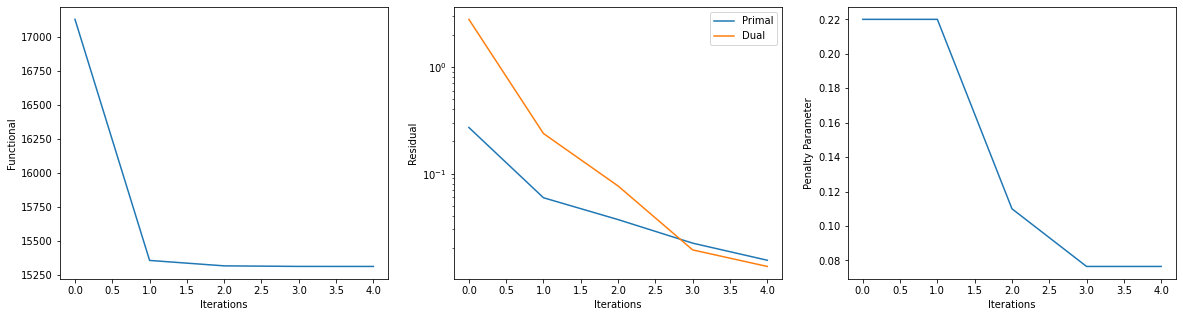

In [48]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T, ptyp='semilogy',
          xlbl='Iterations', ylbl='Residual', lgnd=['Primal', 'Dual'],
          fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()

In [49]:
from skimage.metrics import structural_similarity as ssim
ssim_const_1 = ssim(img, imgr,
                  data_range=imgr.max() - imgr.min(), multichannel=True)

print(ssim_const_1)#structure similarity between two random variables -it measures contrast,variance,mean, luminous,covariance 

0.1311614446250309
